# Analysis 1
- Analyzed each article and capturing its category from past 20 years
- Calculated frequency of article's category
- Printed the top ten article categories alongwith its frequency
- Plotted a graph to show captured information visually

In [ ]:
# Importing the required modules
import json
import os
import nltk
import operator
import numpy as np # Used only for arranging y axis values on graph plotted
from matplotlib import pyplot as plt

In [15]:
coverage_details = [] # Creating an empty list to store article type, its headline, published date and its id
path_archive = os.path.expanduser('~\\midterm\\data\\nyt\\archive') # Creating a local path to fetch archive data

for subdir, dirs, files in os.walk(path_archive): # Looping through each files present under directories and sub directories
    for file in files: # Looping through each found directories, subdirectories or files
        if(file[0] != '.'): # If selected file is a file and not a directory
            
            try: # Putting whole code in a try except block to catch unwanted errors
                response = open(os.path.join(subdir, file), 'r', errors = 'ignore') # Opening the file
                data = json.load(response) # Storing the data from opened file
                for x in data['response']['docs']: # Looping through each data section in opened file
                    if x['news_desk'] is None: # Checking if the article_type is null or not
                        if x['section_name'] is None:
                            # If section_type is also null then provide default value
                            coverage_details.append([x['_id'], x['headline']['main'], 'Unknown', x['pub_date'][:10], x['word_count']])
                        else:
                            # If article_type and section_type is not null then using section_type as article_type
                            coverage_details.append([x['_id'], x['headline']['main'], x['section_name'], x['pub_date'][:10], x['word_count']])                                                   
                    
                    else: # Else giving article_type value
                        coverage_details.append([x['_id'], x['headline']['main'], x['news_desk'], x['pub_date'][:10], x['word_count']])
                    
            except:
                pass



In [16]:
coverage_area = [x[2] for x in coverage_details] # Capturing all article_type
coverage_area_unique = set([x[2] for x in coverage_details]) # Storing unique article_type in a list

In [17]:
count_coverage = 0 # Creating a count variable and assigning value 0 to it
coverage_area_dict = {} # Creating an empty dictionary to store article_type and its frequency

for x in coverage_area_unique: # Looping through each unique article_type
    for y in coverage_area: # Looping through all article_type
        if x == y: # If both are equal
            count_coverage = count_coverage + 1 # Incrementing the article_type count by 1
    coverage_area_dict.update({x:count_coverage}) # Dumping article_type and its frequency in a dictionary
    count_coverage = 0 # Reassigning the temp count variable to 0 for outer for loop

In [22]:
# Sorting the dictionary in descending order of frequency
sorted_coverage = sorted(coverage_area_dict.items(), key=operator.itemgetter(1), reverse = True)

# Displaying top 10 results
print(sorted_coverage[:10])

[('Metropolitan Desk', 126867), ('Classified', 119568), ('Sports', 107903), ('Business/Financial Desk', 85073), ('Business', 82206), ('Sports Desk', 79134), ('Editorial Desk', 76608), ('National Desk', 66981), ('Foreign', 66924), ('Foreign Desk', 59538)]


In [23]:
y_values = [x[1] for x in sorted_coverage[:10]] # Storing top 10 frequencies to be used for y-axis
x_values = [y[0] for y in sorted_coverage[:10]] # Storing top 10 frequencies to be used for y-axis

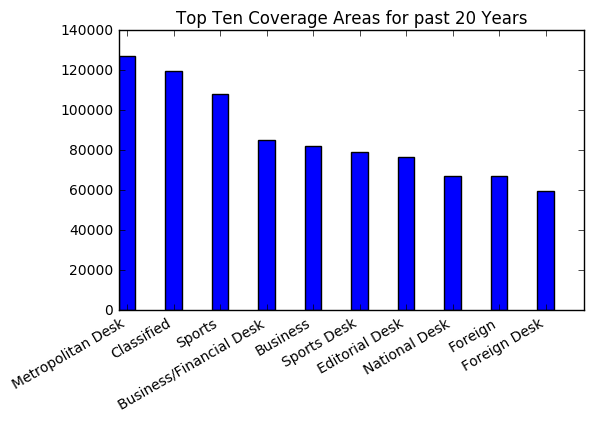

In [24]:
fig = plt.figure() # Calling the figure function from matplotlib module
ax = fig.add_subplot(111) # Creating a subplot
ax.set_title("Top Ten Coverage Areas for past 20 Years") # Setting up the title for plot

width = .35 # Setting the width between each element of histogram
ind = np.arange(len(y_values)) # Arranging the frequencies on y axis
plt.bar(ind, y_values, width=width) # Plotting the chart
plt.xticks(ind + width / 2, x_values) # Displaying the tick in the middle on x axis

fig.autofmt_xdate() # Formatting the x axis to make values readable

# Creating a path to store the created chart
save_path = os.path.expanduser('~\\midterm\\que2\\ana_1\\Top Ten Coverage Areas.pdf')

plt.savefig(save_path) # Saving the chart to desired location

plt.show() # Displaying the chart